## 정리한 데이터 불러오기

In [1]:
import pandas as pd

df_protein = pd.read_csv('/Users/doukkim/Downloads/protein_clean.csv', index_col = [0])

In [2]:
df_protein.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81474 entries, 0 to 81473
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classification            81474 non-null  object 
 1   experimentalTechnique     81474 non-null  object 
 2   residueCount              81474 non-null  int64  
 3   resolution                81474 non-null  float64
 4   structureMolecularWeight  81474 non-null  float64
 5   crystallizationTempK      81474 non-null  float64
 6   densityPercentSol         81474 non-null  float64
 7   phValue                   81474 non-null  float64
 8   chainId                   81474 non-null  object 
 9   A                         81474 non-null  int64  
 10  K                         81474 non-null  int64  
 11  N                         81474 non-null  int64  
 12  D                         81474 non-null  int64  
 13  C                         81474 non-null  int64  
 14  H     

In [3]:
df_protein

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityPercentSol,phValue,chainId,A,...,R,Y,W,E,Q,non-polar_amino,polar_amino,acidic_amino,basic_amino,ph_scale
0,Others,X-RAY DIFFRACTION,232,2.53,26562.73,277.0,34.00,7.7,A,12,...,16,5,1,17,12,97,61,29,45,Basic
1,Others,X-RAY DIFFRACTION,430,2.20,47657.25,277.0,51.03,7.6,AB,38,...,26,2,2,36,14,222,78,64,66,Basic
2,Others,X-RAY DIFFRACTION,222,2.20,25718.97,277.0,43.00,8.0,ABCD,12,...,16,14,2,16,8,84,72,26,36,Basic
3,Others,X-RAY DIFFRACTION,222,2.20,25786.99,277.0,54.00,4.6,ABCD,12,...,16,14,2,16,8,84,72,26,36,Acidic
4,Others,X-RAY DIFFRACTION,222,2.00,25779.02,277.0,54.00,4.6,ABCD,12,...,16,14,2,16,8,84,72,26,36,Acidic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81469,Others,X-RAY DIFFRACTION,280,2.18,36239.98,293.0,70.23,7.5,T,12,...,14,13,1,22,10,110,79,44,47,Neutral
81470,PROTEIN BINDING,X-RAY DIFFRACTION,837,2.54,93918.31,298.0,62.96,4.0,A,29,...,21,15,8,34,19,410,273,74,80,Acidic
81471,HYDROLASE,X-RAY DIFFRACTION,316,1.43,35228.97,293.0,46.68,6.0,A,28,...,10,28,3,7,14,143,113,31,29,Acidic
81472,Others,X-RAY DIFFRACTION,207,1.50,22377.15,293.0,59.60,7.5,A,16,...,12,8,3,6,4,94,72,18,23,Neutral


## 분석

### 데이터 셋 나누기 (train / validation / test)

In [4]:
target = "classification"
features = df_protein.drop(target, axis = 1).columns

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_protein, test_size = 0.2, random_state = 1, stratify = df_protein[target])
train, val = train_test_split(train, test_size = 0.2, random_state = 1, stratify = train[target])

In [6]:
train.shape, val.shape, test.shape

((52143, 34), (13036, 34), (16295, 34))

In [7]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

### 기준모델

In [8]:
#필요한 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import accuracy_score, classification_report

from sklearn.utils.class_weight import compute_sample_weight

In [9]:
#기준모델 생성
LogisticRegression
logistic = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LogisticRegression(multi_class = "ovr", max_iter = 200, n_jobs = -1))


logistic.fit(X_train, y_train)

/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['experimentalTechnique', 'chainId',
                                     'ph_scale'])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, multi_class='ovr',
                                    n_jobs=-1))])

In [10]:
#예측값 도출 (기준모델)
y_pred_logistic_train = logistic.predict(X_train)
y_pred_logistic_val = logistic.predict(X_val)

#평가 (기준모델)
print('\n <기준모델 (Logistic Regression)>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_logistic_train)) #훈련데이터 정확도:  0.3969852137391404
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_logistic_val)) #검증데이터 정확도:  0.380101258054618


 <기준모델 (Logistic Regression)>
훈련데이터 정확도:  0.3969852137391404
검증데이터 정확도:  0.380101258054618


### 모델 학습 및 평가  (hyperparameter tuning X)

In [13]:
#OrdinalEncoding
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

#Model 생성
#RandomForestClassifier
forest = RandomForestClassifier( random_state = 1
                                , n_jobs = -1
                                , criterion = "entropy")

#XGBClassifier
eval_set = [(X_val_encoded, y_val)]

xgb = XGBClassifier(random_state = 1
                    , n_estimators = 1000
                    , n_jobs = -1
                    , num_class = 16
                    , learning_rate = 0.2
                    , eval_metric = "mlogloss")

#OneVsRestClassifier_RandomForest
one_rest_forest = OneVsRestClassifier(forest, n_jobs=-1)

#OneVsRestClassifier_XGB
one_rest_xgb = OneVsRestClassifier(xgb, n_jobs=-1)

In [14]:
#모델 학습
forest.fit(X_train_encoded, y_train)
xgb.fit(X_train_encoded, y_train, eval_set = eval_set, early_stopping_rounds = 100, eval_metric = "mlogloss")
one_rest_forest.fit(X_train_encoded, y_train)
one_rest_xgb.fit(X_train_encoded, y_train)

/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:2.44459
[1]	validation_0-mlogloss:2.27591
[2]	validation_0-mlogloss:2.15555
[3]	validation_0-mlogloss:2.06378
[4]	validation_0-mlogloss:1.99189
[5]	validation_0-mlogloss:1.93175
[6]	validation_0-mlogloss:1.88147
[7]	validation_0-mlogloss:1.84031
[8]	validation_0-mlogloss:1.80090
[9]	validation_0-mlogloss:1.76725
[10]	validation_0-mlogloss:1.73909
[11]	validation_0-mlogloss:1.71413
[12]	validation_0-mlogloss:1.69112
[13]	validation_0-mlogloss:1.67129
[14]	validation_0-mlogloss:1.65177
[15]	validation_0-mlogloss:1.63617
[16]	validation_0-mlogloss:1.61884
[17]	validation_0-mlogloss:1.60398
[18]	validation_0-mlogloss:1.59052
[19]	validation_0-mlogloss:1.57842
[20]	validation_0-mlogloss:1.56747
[21]	validation_0-mlogloss:1.55540
[22]	validation_0-mlogloss:1.54571
[23]	validation_0-mlogloss:1.53714
[24]	validation_0-mlogloss:1.52753
[25]	validation_0-mlogloss:1.52001
[26]	validation_0-mlogloss:1.51265
[27]	validation_0-mlogloss:1.50614
[28]	validation_0-mlogloss:1.4

/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.2, max_delta_step=0,
                                            max_depth=6, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=1000, n_jobs=-1,
                                            num_class=16, num_parallel_tree=1,
                                            objective='multi:s

In [15]:
#예측값 도출
y_pred_forest_train = forest.predict(X_train_encoded)
y_pred_forest_val = forest.predict(X_val_encoded)

y_pred_xgb_train = xgb.predict(X_train_encoded)
y_pred_xgb_val = xgb.predict(X_val_encoded)

y_pred_onerest_forest_train = one_rest_forest.predict(X_train_encoded)
y_pred_onerest_forest_val = one_rest_forest.predict(X_val_encoded)

y_pred_onerest_xgb_train = one_rest_xgb.predict(X_train_encoded)
y_pred_onerest_xgb_val = one_rest_xgb.predict(X_val_encoded)

#평가
print('\n <RandomForestClassifier>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_forest_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_forest_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_forest_val))

print('\n <XGBClassifier>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_xgb_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_xgb_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_xgb_val))

print('\n <OneVsRestClassifier_RandomForest>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_onerest_forest_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_onerest_forest_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_onerest_forest_val))

print('\n <OneVsRestClassifier_XGB>')
print('훈련데이터 정확도: ', accuracy_score(y_train, y_pred_onerest_xgb_train))
print('검증데이터 정확도: ', accuracy_score(y_val, y_pred_onerest_xgb_val))
print('\n classification_report \n ', classification_report(y_val, y_pred_onerest_xgb_val))


 <RandomForestClassifier>
훈련데이터 정확도:  0.9999616439407015
검증데이터 정확도:  0.7065817735501687

 classification_report 
                                     precision    recall  f1-score   support

                        HYDROLASE       0.80      0.71      0.75      2206
    HYDROLASE/HYDROLASE INHIBITOR       0.67      0.58      0.62       320
                    IMMUNE SYSTEM       0.89      0.74      0.81       475
                        ISOMERASE       0.95      0.52      0.67       297
                           LIGASE       0.93      0.46      0.62       239
                            LYASE       0.87      0.65      0.74       525
                 MEMBRANE PROTEIN       0.83      0.53      0.65       162
                   OXIDOREDUCTASE       0.81      0.74      0.77      1350
                           Others       0.60      0.86      0.70      4126
                  PROTEIN BINDING       0.67      0.17      0.27       185
                SIGNALING PROTEIN       0.83      0.31    

/Users/doukkim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


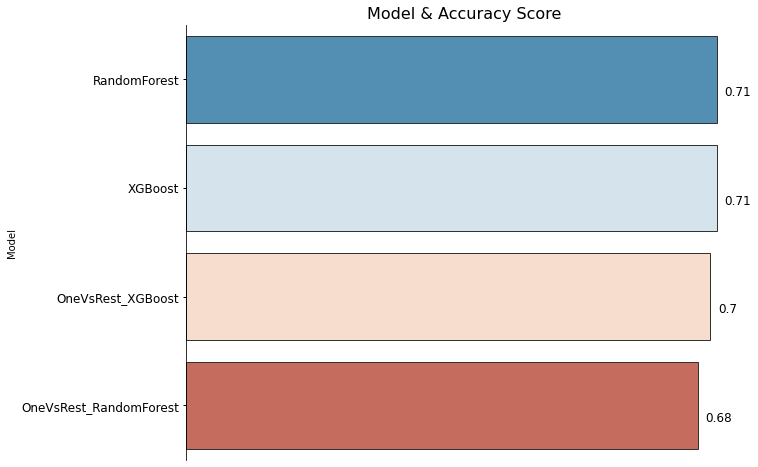

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

classifier = ["RandomForest", "OneVsRest_RandomForest", "XGBoost", "OneVsRest_XGBoost"]

model = pd.DataFrame([accuracy_score(y_val, y_pred_forest_val),
                         accuracy_score(y_val, y_pred_xgb_val),
                         accuracy_score(y_val, y_pred_onerest_forest_val),
                         accuracy_score(y_val, y_pred_onerest_xgb_val)],
                    classifier).reset_index()
model.columns = ["Model", "acc_score"]
model.sort_values("acc_score",ascending = False,inplace=True)
model.reset_index(drop=True,inplace = True)


f, ax = plt.subplots(figsize=(10,8))
sns.barplot('acc_score','Model',data = model, ax=ax,palette='RdBu_r',edgecolor=".2")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.55, \
        str(round((i.get_width()), 2)), fontsize=12, color='black') 
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
ax.tick_params(**kwargs)
x_axis = ax.axes.get_xaxis().set_visible(False)
ax.set_title('Model & Accuracy Score',fontsize=16)
sns.despine(bottom=True)
plt.show()

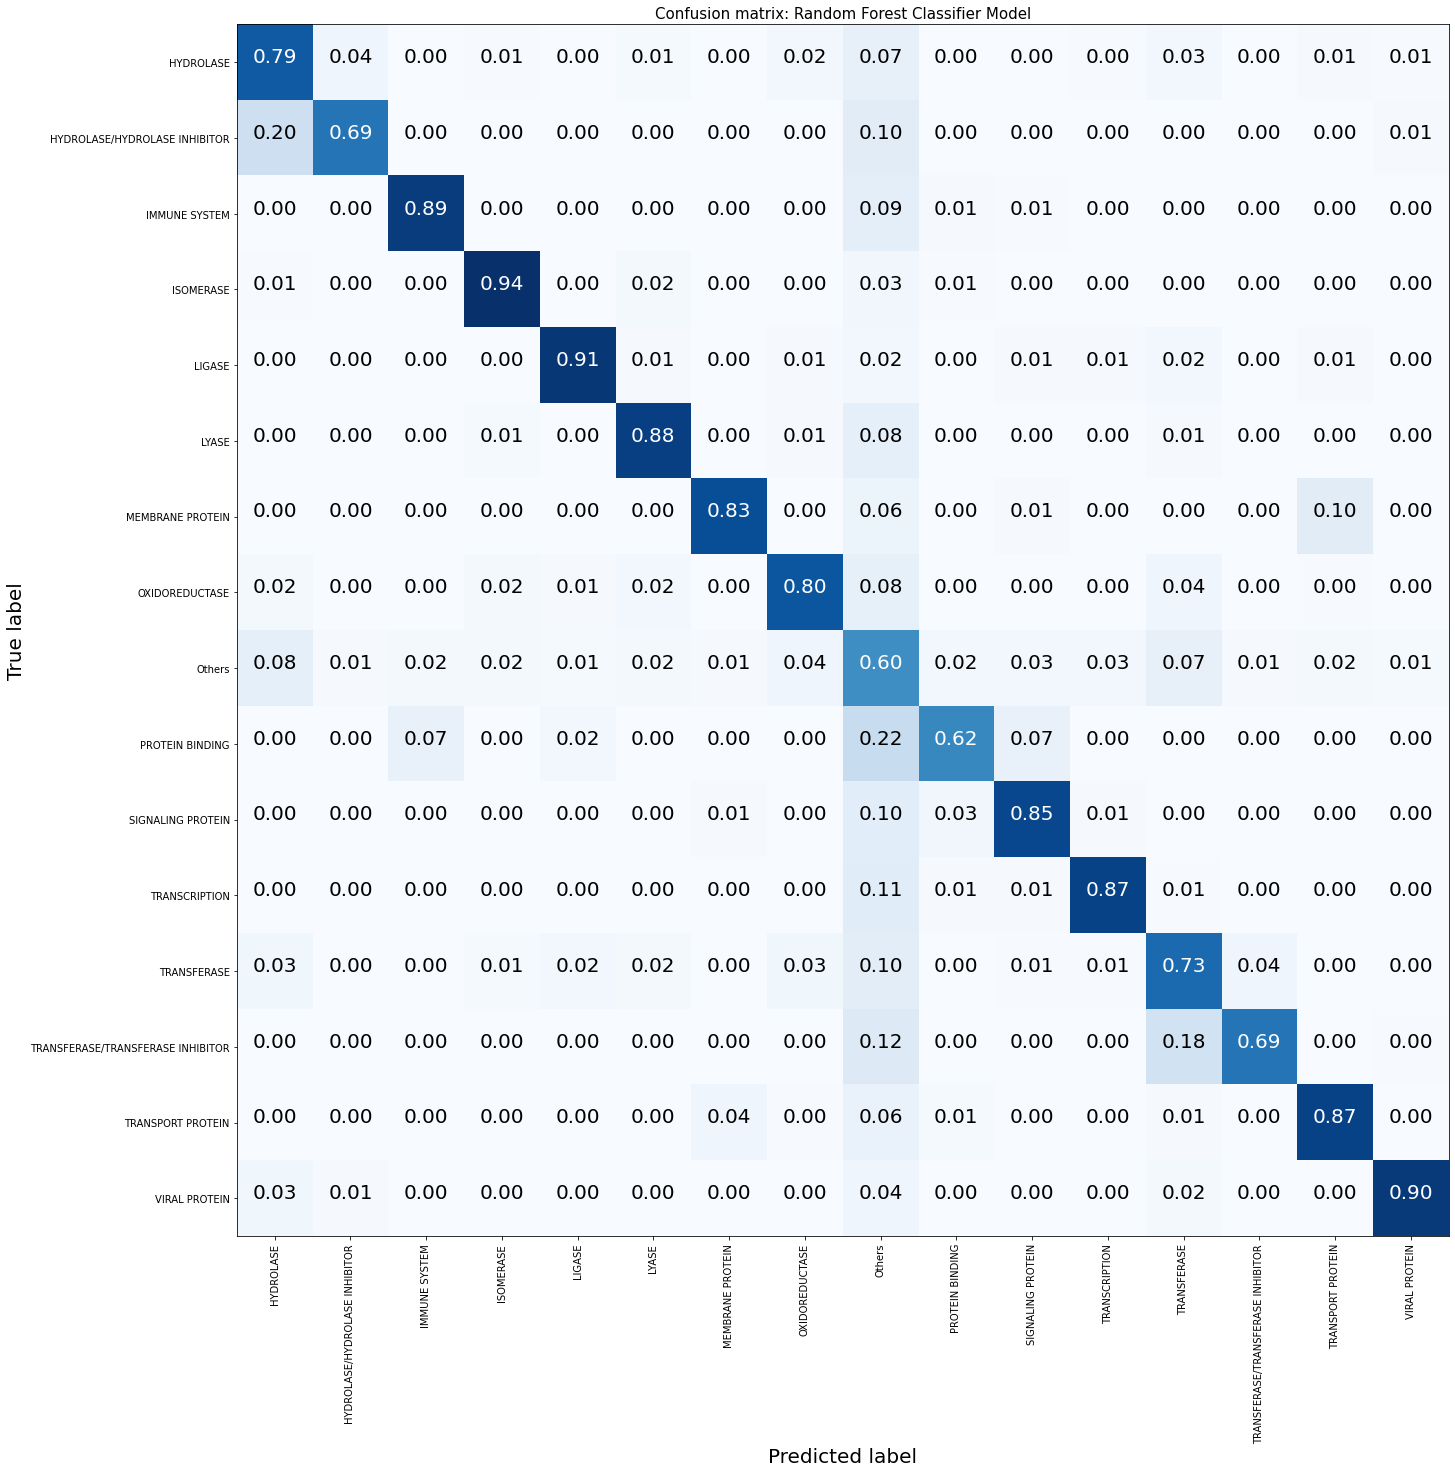

In [19]:
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Compute confusion matrix
def single_model(model):
    clf = model
    clf.fit(X_train_encoded, y_train)
    y_pred = clf.predict(X_val_encoded)
    conf_mx = confusion_matrix(y_pred, y_val, normalize = "true")
    return conf_mx

#plot confusion matrix    
def plot_confusion_matrix(cm, classes,model_name):

    plt.figure(figsize=(20,30))
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix: '+ model_name, fontsize=15)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = 'f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=20)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20,color='black')
    plt.xlabel('Predicted label',fontsize=20,color='black')
    np.set_printoptions(precision=2)
    
    return plt.show()
classes = ['HYDROLASE','HYDROLASE/HYDROLASE INHIBITOR','IMMUNE SYSTEM',
          "ISOMERASE", "LIGASE", "LYASE", "MEMBRANE PROTEIN", "OXIDOREDUCTASE",
          "Others", "PROTEIN BINDING", "SIGNALING PROTEIN", "TRANSCRIPTION", "TRANSFERASE",
          "TRANSFERASE/TRANSFERASE INHIBITOR", "TRANSPORT PROTEIN", "VIRAL PROTEIN"]
#plot_confusion_matrix(single_model(ExtraTreesClassifier()), classes,'Extra Trees Classifier Model')
plot_confusion_matrix(single_model(RandomForestClassifier()), classes,'Random Forest Classifier Model')
#plot_confusion_matrix(single_model(SVC()), classes,'Support Vector Classifier Model')

In [24]:
#하이퍼 파라미터 튜닝을 하니깐 성능이 더 떨어짐. > 과정 생략

In [25]:
y_pred_forest_test = forest.predict(X_test_encoded)

print('\n <RandomForestClassifier>')
print('테스트데이터 정확도: ', accuracy_score(y_test, y_pred_forest_test))
print('\n classification_report \n ', classification_report(y_test, y_pred_forest_test))


 <RandomForestClassifier>
테스트데이터 정확도:  0.7049401656949985

 classification_report 
                                     precision    recall  f1-score   support

                        HYDROLASE       0.80      0.72      0.76      2758
    HYDROLASE/HYDROLASE INHIBITOR       0.72      0.62      0.67       400
                    IMMUNE SYSTEM       0.90      0.73      0.81       593
                        ISOMERASE       0.94      0.59      0.73       371
                           LIGASE       0.93      0.43      0.58       298
                            LYASE       0.89      0.60      0.72       657
                 MEMBRANE PROTEIN       0.84      0.50      0.63       203
                   OXIDOREDUCTASE       0.80      0.74      0.77      1687
                           Others       0.59      0.86      0.70      5157
                  PROTEIN BINDING       0.81      0.19      0.30       231
                SIGNALING PROTEIN       0.81      0.31      0.45       349
             

### Permutation  importance & feature selection

In [26]:
#경고 메시지 제어
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    forest.fit(X_train_encoded, y_train), # model
    scoring='accuracy', # metric
    n_iter=3, # 다른 random seed를 사용하여 5번 반복
    random_state=2)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업
permuter.fit(X_val_encoded, y_val);

In [27]:
# feature 별로 permutation importance score 확인
feature_names = X_val.columns.tolist()
feature_importance = pd.DataFrame(permuter.feature_importances_, feature_names, columns = ["Weight"])
feature_importance.sort_values(by = "Weight", ascending=False).style.background_gradient(cmap = "coolwarm").set_precision(3)

,Weight
G,0.043
chainId,0.042
A,0.029
W,0.019
C,0.018
non-polar_amino,0.015
P,0.015
L,0.013
E,0.012
structureMolecularWeight,0.011


In [28]:
#  feature 별로 permutation importance score 확인 (표준편차 포함)
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 보여줌.
    feature_names = feature_names) # list 형식으로 넣어야 함.

Weight,Feature
0.0432 ± 0.0006,G
0.0424 ± 0.0035,chainId
0.0289 ± 0.0006,A
0.0190 ± 0.0022,W
0.0178 ± 0.0036,C
0.0152 ± 0.0016,non-polar_amino
0.0151 ± 0.0010,P
0.0134 ± 0.0021,L
0.0122 ± 0.0029,E
0.0109 ± 0.0013,structureMolecularWeight
